In [1]:
from Application.PaparazziSimulation import PaparazziSimulation
from Application.plot_map import plot_map
import pandas as pd

# Perform Simulatio

In [2]:
simulation = PaparazziSimulation()
iterations=1
selected_map_sizes=[50]
selected_heuristics=['Manhattan']

Testmap_weighted_50
Testmap_weighted_100
Skipping map of size 100
Testmap_weighted_25
Skipping map of size 25
Testmap_weighted_200
Skipping map of size 200


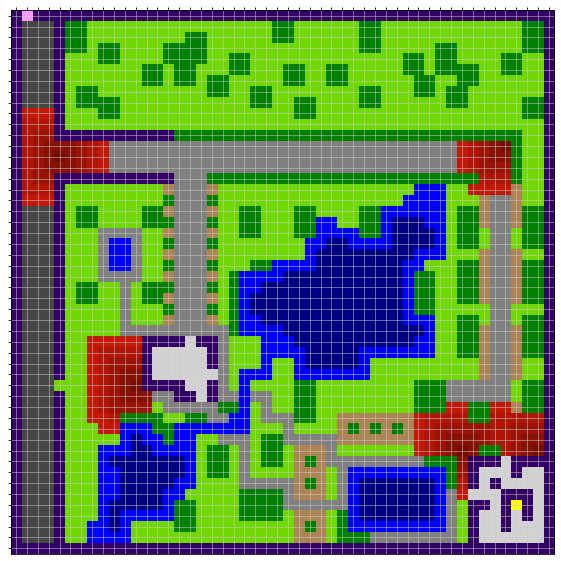

Started Testmap_weighted_50 with Manhattan heuristic
Iteration 0 of 1
Finished Testmap_weighted_50 (diagonal) with Manhattan heuristic in 81 iterations and 0.32min with 1 A* executions


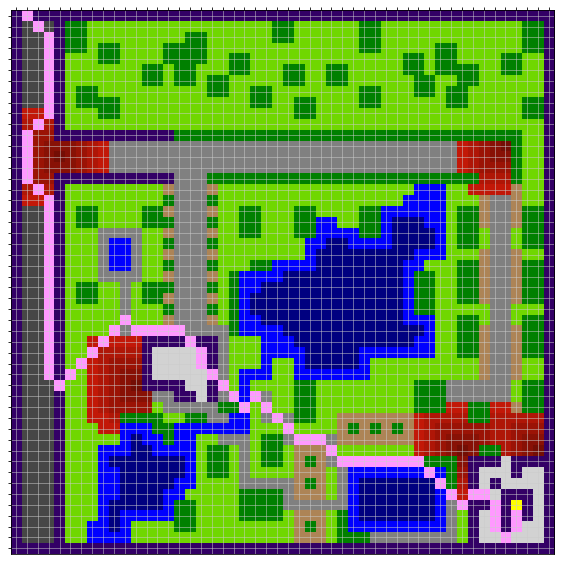

Saving Visualization/10062022_Testmap_weighted_50_diagonal_Manhattan_0.gif
Started Testmap_weighted_50 with Manhattan heuristic
Iteration 0 of 1
Finished Testmap_weighted_50 (no_diagonal) with Manhattan heuristic in 106 iterations and 0.48min with 1 A* executions


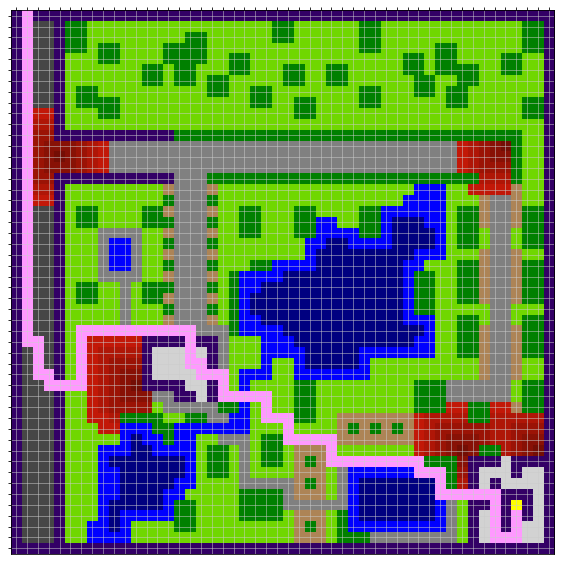

Saving Visualization/10062022_Testmap_weighted_50_no_diagonal_Manhattan_0.gif


In [3]:
game_result_no_security = simulation.play("Maps/",num_security_guards=0, iterations=iterations, selected_map_sizes=selected_map_sizes, selected_heuristics=selected_heuristics)

Testmap_weighted_50
Testmap_weighted_100
Skipping map of size 100
Testmap_weighted_25
Skipping map of size 25
Testmap_weighted_200
Skipping map of size 200


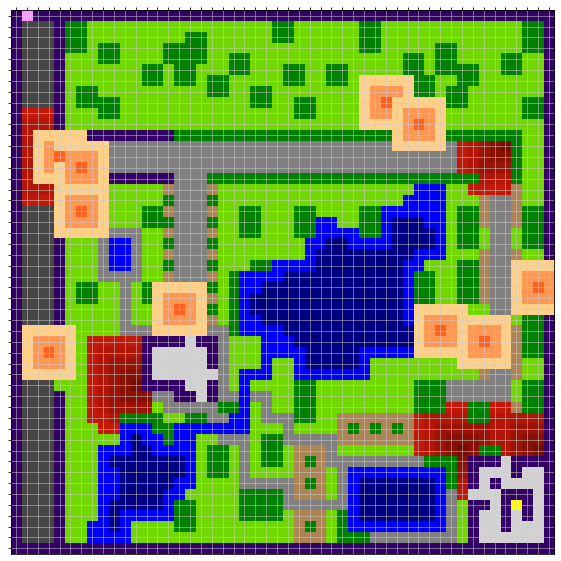

Started Testmap_weighted_50 with Manhattan heuristic
Iteration 0 of 1
Finished Testmap_weighted_50 (diagonal) with Manhattan heuristic in 84 iterations and 0.42min with 12 A* executions


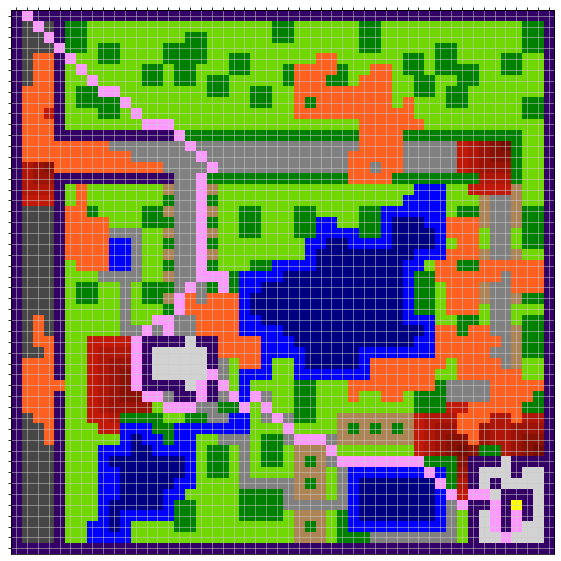

Saving Visualization/10062022_Testmap_weighted_50_diagonal_Manhattan_0.gif
Started Testmap_weighted_50 with Manhattan heuristic
Iteration 0 of 1
Finished Testmap_weighted_50 (no_diagonal) with Manhattan heuristic in 96 iterations and 0.41min with 1 A* executions


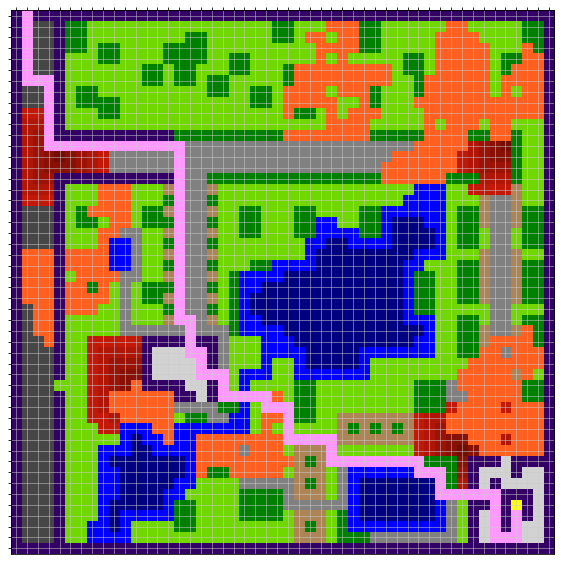

Saving Visualization/10062022_Testmap_weighted_50_no_diagonal_Manhattan_0.gif


In [4]:
game_result_with_security_smart = simulation.play("Maps/",num_security_guards=10, iterations=iterations, selected_map_sizes=selected_map_sizes, selected_heuristics=selected_heuristics)

Testmap_weighted_50
Testmap_weighted_100
Skipping map of size 100
Testmap_weighted_25
Skipping map of size 25
Testmap_weighted_200
Skipping map of size 200


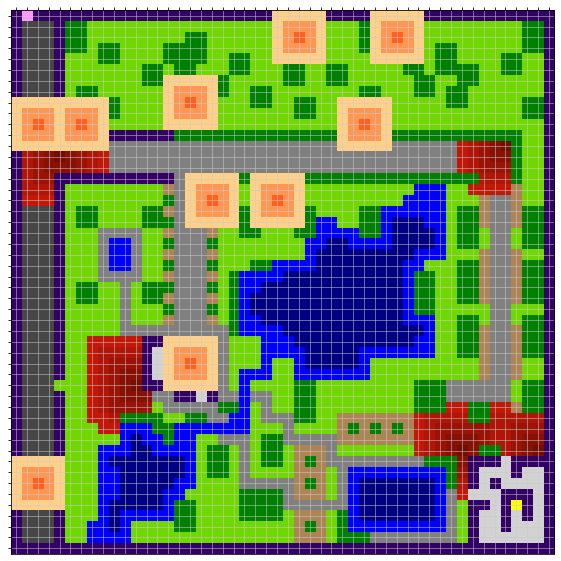

Started Testmap_weighted_50 with Manhattan heuristic
Iteration 0 of 1
Finished Testmap_weighted_50 (diagonal) with Manhattan heuristic in 88 iterations and 0.61min with 88 A* executions


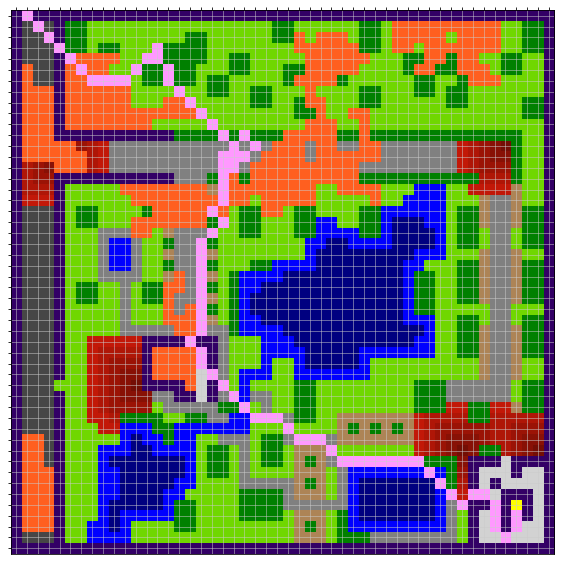

Saving Visualization/10062022_Testmap_weighted_50_diagonal_Manhattan_0.gif
Started Testmap_weighted_50 with Manhattan heuristic
Iteration 0 of 1
Finished Testmap_weighted_50 (no_diagonal) with Manhattan heuristic in 126 iterations and 0.8min with 126 A* executions


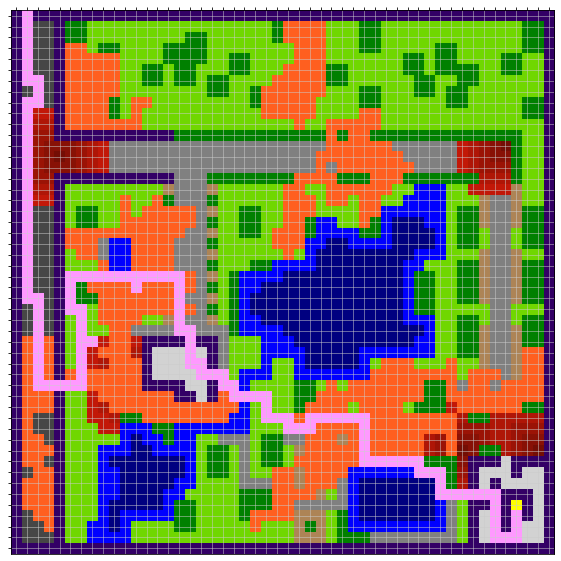

Saving Visualization/10062022_Testmap_weighted_50_no_diagonal_Manhattan_0.gif


In [5]:
game_result_with_security_dumb = simulation.play("Maps/",num_security_guards=10, iterations=iterations, selected_map_sizes=selected_map_sizes, smart_path_finding=False, selected_heuristics=selected_heuristics)

Testmap_weighted_50
Skipping map of size 50
Testmap_weighted_100
Skipping map of size 100
Testmap_weighted_25
Testmap_weighted_200
Skipping map of size 200


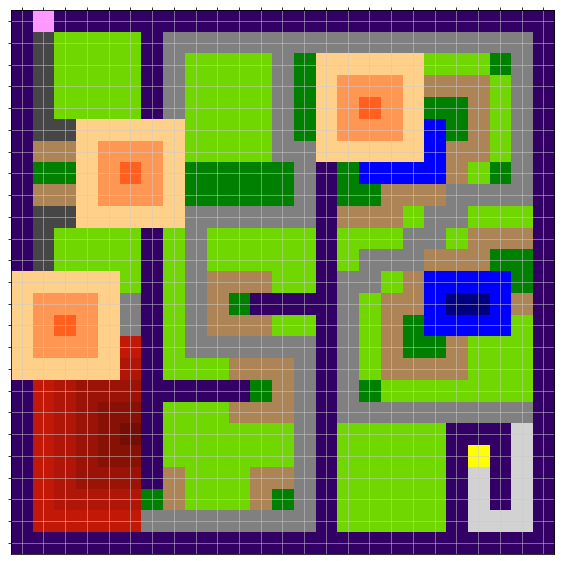

Started Testmap_weighted_25 with Manhattan heuristic
Iteration 0 of 1
Finished Testmap_weighted_25 (diagonal) with Manhattan heuristic in 47 iterations and 0.14min with 18 A* executions


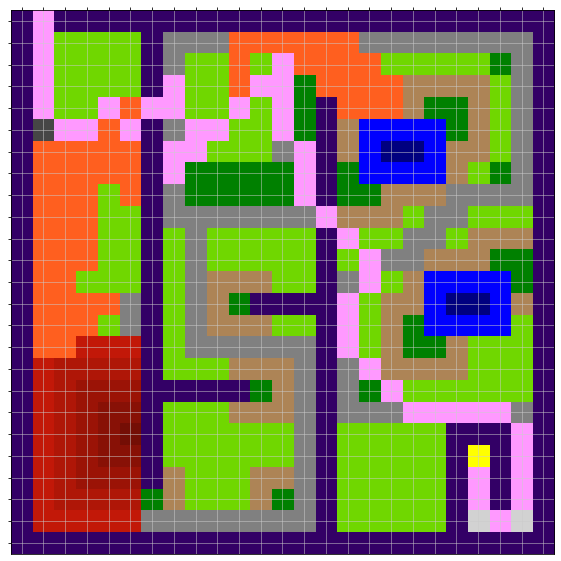

Saving Visualization/10062022_Testmap_weighted_25_diagonal_Manhattan_0.gif
Started Testmap_weighted_25 with Manhattan heuristic
Iteration 0 of 1
Finished Testmap_weighted_25 (no_diagonal) with Manhattan heuristic in 54 iterations and 0.15min with 5 A* executions


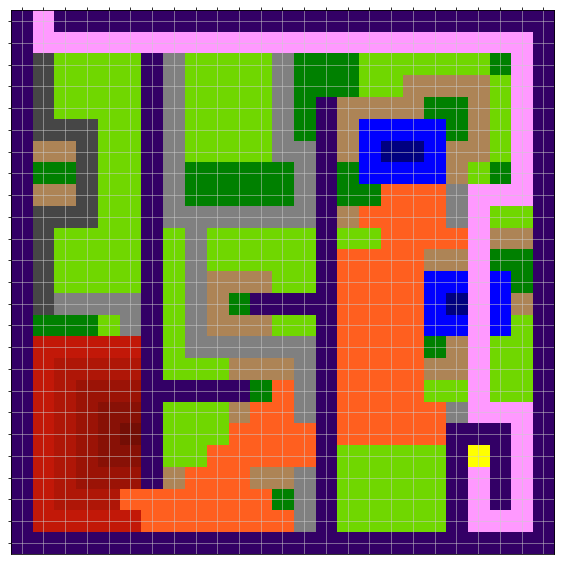

Saving Visualization/10062022_Testmap_weighted_25_no_diagonal_Manhattan_0.gif


In [6]:
game_result_with_3_security_smart_25 = simulation.play("Maps/",num_security_guards=3, iterations=iterations, selected_map_sizes=[25], selected_heuristics=selected_heuristics)

Testmap_weighted_50
Skipping map of size 50
Testmap_weighted_100
Skipping map of size 100
Testmap_weighted_25
Testmap_weighted_200
Skipping map of size 200


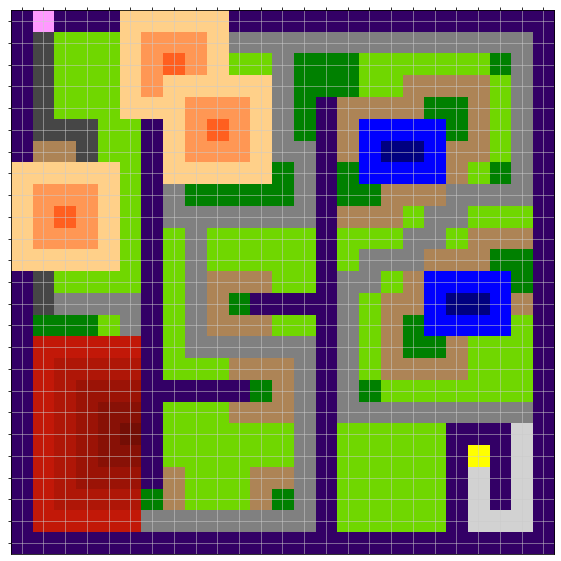

Started Testmap_weighted_25 with Manhattan heuristic
Iteration 0 of 1
Finished Testmap_weighted_25 (diagonal) with Manhattan heuristic in 70 iterations and 0.21min with 70 A* executions


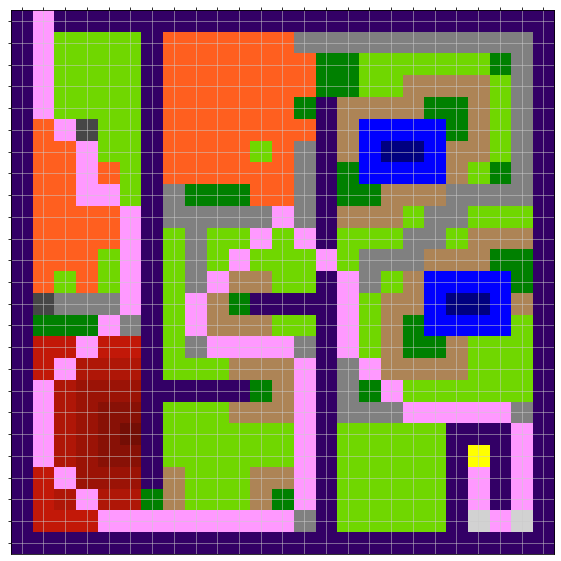

Saving Visualization/10062022_Testmap_weighted_25_diagonal_Manhattan_0.gif
Started Testmap_weighted_25 with Manhattan heuristic
Iteration 0 of 1
Finished Testmap_weighted_25 (no_diagonal) with Manhattan heuristic in 56 iterations and 0.17min with 56 A* executions


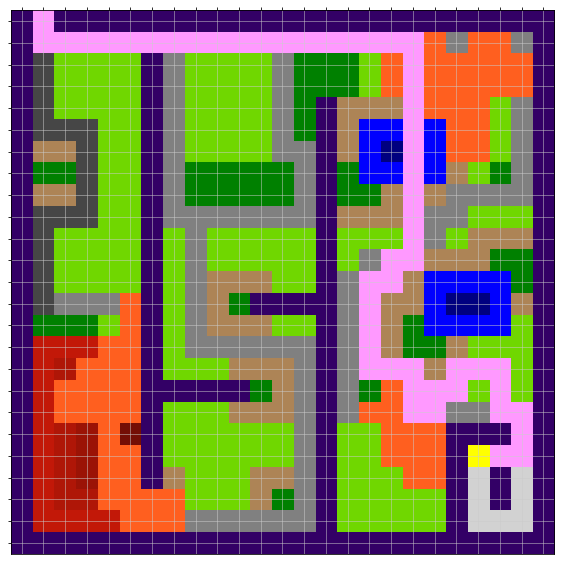

Saving Visualization/10062022_Testmap_weighted_25_no_diagonal_Manhattan_0.gif


In [7]:
game_result_with_3_security_dumb_25 = simulation.play("Maps/",num_security_guards=3, iterations=iterations, selected_map_sizes=[25], smart_path_finding=False, selected_heuristics=selected_heuristics)

In [8]:
simulations = game_result_no_security + game_result_with_security_smart + game_result_with_security_dumb + game_result_with_3_security_dumb_25 + game_result_with_3_security_smart_25

# Load Results in DataFrame

In [9]:
columns=['name', 'time_elapsed', 'total_iteration', 'a_star_executions','total_cost', 'path_length', 'heuristic','map', 'diagonal_movement', 'num_security_guards','smart_path_finding']

In [10]:
df_simulations = pd.DataFrame([[getattr(i,j) for j in columns] for i in simulations], columns=columns)
df_simulations.to_csv('simulation.csv')

In [11]:
df_grouped_simulations = df_simulations.groupby(['map','heuristic','diagonal_movement','smart_path_finding', 'num_security_guards'])[['total_cost', 'time_elapsed', 'a_star_executions']]

In [12]:
df_describe = df_grouped_simulations.describe()

Drop less relevant columns

In [13]:
df_describe = df_describe.drop(['count', 'std', 'min', 'max'], axis=1, level=1)

Round values

In [14]:
df_describe[('time_elapsed','mean')] = df_describe[('time_elapsed','mean')].round(2)
df_describe[('time_elapsed','25%')] = df_describe[('time_elapsed','25%')].round(2)
df_describe[('time_elapsed','50%')] = df_describe[('time_elapsed','50%')].round(2)
df_describe[('time_elapsed','75%')] = df_describe[('time_elapsed','75%')].round(2)

df_describe[('a_star_executions','mean')] = df_describe[('a_star_executions','mean')].round()
df_describe[('a_star_executions','25%')] = df_describe[('a_star_executions','25%')].round()
df_describe[('a_star_executions','50%')] = df_describe[('a_star_executions','50%')].round()
df_describe[('a_star_executions','75%')] = df_describe[('a_star_executions','75%')].round()

In [15]:
df_describe = df_describe.astype({('a_star_executions','mean'):'int'})
df_describe = df_describe.astype({('a_star_executions','25%'):'int'})
df_describe = df_describe.astype({('a_star_executions','50%'):'int'})
df_describe = df_describe.astype({('a_star_executions','75%'):'int'})

Display summary of simulation results

In [16]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
df_describe

total_cost  \
                                                                                             mean   
map                 heuristic diagonal_movement smart_path_finding num_security_guards              
Testmap_weighted_25 Manhattan False             False              3                       6482.0   
                                                True               3                       3383.0   
                              True              False              3                       3487.0   
                                                True               3                       6253.0   
Testmap_weighted_50 Manhattan False             False              10                      1098.0   
                                                True               0                        788.0   
                                                                   10                       814.0   
                              True              False              10                      3886.0   
                                                True               0                        586.0   
                                                                   10                      3832.0   

                                                                                                \
                                                                                           25%   
map                 heuristic diagonal_movement smart_path_finding num_security_guards           
Testmap_weighted_25 Manhattan False             False              3                    6482.0   
                                                True               3                    3383.0   
                              True              False              3                    3487.0   
                                                True               3                    6253.0   
Testmap_weighted_50 Manhattan False             False              10                   1098.0   
                                                True               0                     788.0   
                                                                   10                    814.0   
                              True              False              10                   3886.0   
                                                True               0                     586.0   
                                                                   10                   3832.0   

                                                                                                \
                                                                                           50%   
map                 heuristic diagonal_movement smart_path_finding num_security_guards           
Testmap_weighted_25 Manhattan False             False              3                    6482.0   
                                                True               3                    3383.0   
                              True              False              3                    3487.0   
                                                True               3                    6253.0   
Testmap_weighted_50 Manhattan False             False              10                   1098.0   
                                                True               0                     788.0   
                                                                   10                    814.0   
                              True              False              10                   3886.0   
                                                True               0                     586.0   
                                                                   10                   3832.0   

                                                                                                \
                                                                                           75%   
map                 heurist

# Conclusion

* For the map size 100 and 50 we can see no signifcant gap between mean and median -> normal distribution
* For map size 25 we see a significatn gap between mean and median -> no normal distribution
* For map size 25 with 3 security guards  we can see no signifcant gap between mean and median -> normal distribution
* Due to the smaller map size the random placement of the security guards has a significant impact.
* Manhattan seems to produce the lowest path-cost overall
* There is no significant deviation in the overall simulation execution time based on the selected heuristic
* Performing "smart" pathfinding results in a lower path-cost
* The time difference between the smart (only recalculate if security in path proximity) and dump pathfinding is signifcant for map size 100 (up to 5 times faster and similar to map without security guards)